In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
food = pd.read_csv("food_cleaned.csv")
food["date"] = pd.to_datetime(food["date"])
company = pd.read_csv("avg_week_donation_raw.csv")

### Distribution of Number of Pounds

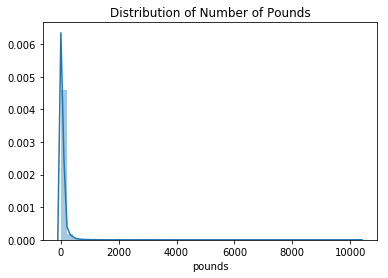

In [3]:
sns.distplot(food["pounds"]);
plt.title("Distribution of Number of Pounds");

$\text{Have a couple outliers that realy skews the data, apply a log transformation to get a better idea of what the data looks like}$

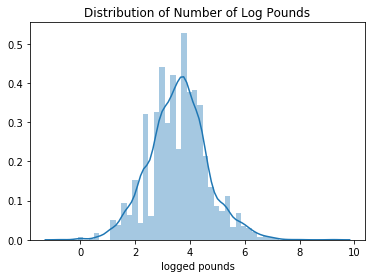

In [4]:
sns.distplot(np.log(food["pounds"]));
plt.title("Distribution of Number of Log Pounds");
plt.xlabel("logged pounds");

In [5]:
food["pounds"].median()

36.0

\begin{align*}
&- \text{Distribution of logged pounds kinda looks normal with mean around 3.5, which is about 33 pounds when exponentiated}\\
&- \text{Median donation is 36 pounds}
\end{align*}

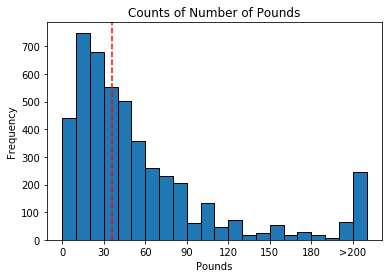

In [6]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
       110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]
food["pounds"].clip(upper = 220).plot.hist(bins = bins, edgecolor = "black");
plt.title("Counts of Number of Pounds");
ax = plt.gca()
ax.set_xticks([0, 30, 60, 90, 120, 150, 180, 210]);
ax.set_xticklabels([0, 30, 60, 90, 120, 150, 180, ">200"]);
plt.xlabel("Pounds");
plt.axvline(x = food["pounds"].median(), color = "r", linestyle = "--");

$\text{Most food donations are between 10-30 pounds}$

### Distribution of Counts and Pounds for Weekday


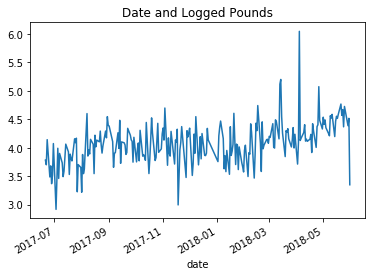

In [7]:
food["date"] = pd.to_datetime(food["date"])
np.log(food.groupby(food["date"])["pounds"].agg(np.mean)).plot();
plt.title("Date and Logged Pounds");

\begin{align*}
&- \text{Review how to perform time series analysis in order to demonstrate whether or not there is a trend. Fit a model and then look at distribution of residuals.}\\
&- \text{From initial glance, appears to be some seasonality (need to review fourier transform)}\\
&- \text{Appears to be an upward trend, so more food donations}
\end{align*}

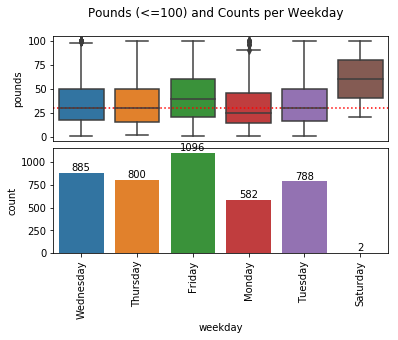

In [8]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[food["pounds"] <= 100]["weekday"],
    y=food[food["pounds"] <= 100]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='weekday',
    data=food[food["pounds"] <= 100],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[food['pounds'] <= 100]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (<=100) and Counts per Weekday");

\begin{align*}
&- \text{Most frequent pickup day is Friday}
\\ &- \text{Of the pickups between 0 and 100 pounds of food, Fridays have a slightly higher average than the other days.}
\\ &- \text{Saturday only has 2 entries, so not very comparable to the other days.}
\end{align*}

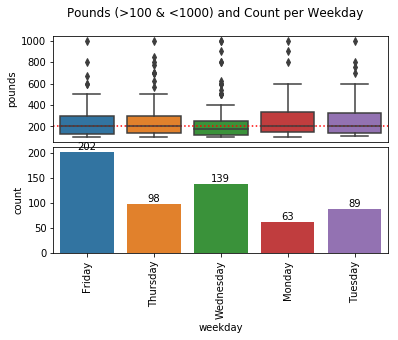

In [9]:
fig, axs = plt.subplots(nrows=2)


sns.boxplot(
    x=food[(food["pounds"] > 100) & (food["pounds"] <= 1000)]['weekday'],
    y=food[(food["pounds"] > 100) & (food["pounds"] <= 1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='weekday',
    data=food[(food["pounds"] > 100) & (food["pounds"] <= 1000)],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food['pounds'] > 100) & (food['pounds'] <= 1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.05)
plt.suptitle("Pounds (>100 & <1000) and Count per Weekday");

\begin{align*}
&- \text{Fridays also have the most pickups for large food pickups.}
\\ &- \text{Not much variation between the means of each of the days.}
\end{align*}

### Distribution of Counts and Pounds for month

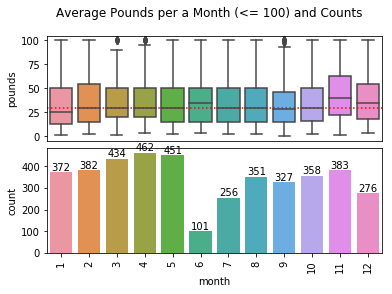

In [10]:
food["year"] = food["year"].astype("int")
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[(food["pounds"] <= 100)]['month'],
    y=food[(food["pounds"] <= 100)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='month',
    data=food[(food["pounds"] <= 100)],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food["pounds"] <= 100)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Average Pounds per a Month (<= 100) and Counts");

\begin{align*}
&- \text{June, November, and December have slightly higher average number of pounds being picked up between 0-100 pounds}\\
&- \text{June was the beginning of the data collection, May was the month with the last data entry}
\end{align*}

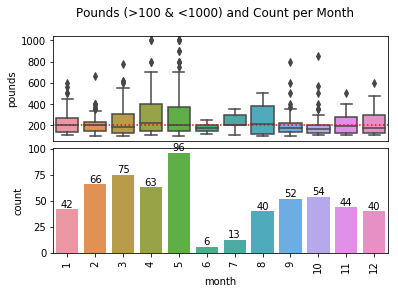

In [11]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]['month'],
    y=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='month',
    data=food[(food['pounds'] > 100) & (food["pounds"] <=1000)],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (>100 & <1000) and Count per Month");

\begin{align*}
& - \text{July has the highest average for number of pounds being picked up. But only has 14 pickups so probably not accurate to say that there is more food waste in July.} 
\\ & - \text{Number of large pickups shot from 63 to 96 between April and May. Is there a reasoning behind this?}  
\end{align*}

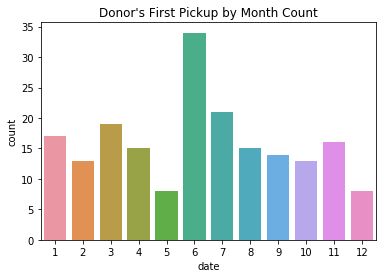

In [50]:
sns.countplot(pd.to_datetime(food.groupby("company")["date"].agg(np.min)).dt.month);
plt.title("Donor's First Pickup by Month Count");

$\text{Most first pickup happen in June, the month in which the data was recorded}$

### Counts and Pounds for Size

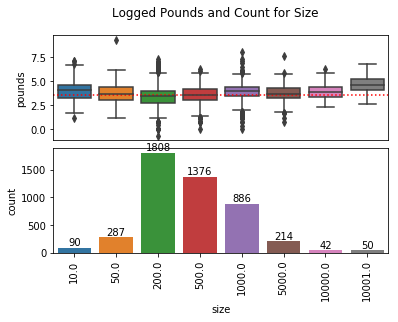

In [13]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food['size'],
    y=np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x='size',
    data=food,
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Count for Size");

\begin{align*}
& -\text{Larger companies (1000+) unsurprisingly has higher amount of food waste} 
\\ &-\text{Company size of 10 has a surprisingly high amount of food waste}
\\ &-\text{Appears to be downward trend and then upward trend with company size and food donation, maybe quadratic trend}
\end{align*}

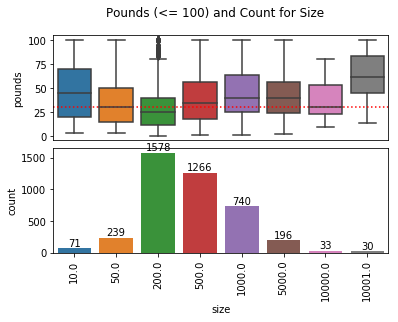

In [14]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[food['pounds'] <= 100]["size"],
    y=food[food["pounds"] <= 100]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='size',
    data=food[food["pounds"] <=100],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[food["pounds"] <=100]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (<= 100) and Count for Size");

$\text{trend for food donation consistent with previous plot, downward trend and then upward trend}$

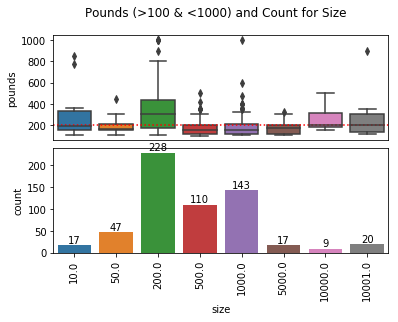

In [15]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food[(food['pounds'] > 100) & (food["pounds"] <=1000)]["size"],
    y=food[(food["pounds"] > 100) & (food["pounds"] <=1000)]["pounds"],
    ax=axs[0]
)

sns.countplot(
    x='size',
    data=food[(food["pounds"] >100) & (food["pounds"] <=1000)],
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= food[(food["pounds"] >100) & (food["pounds"] <=1000)]["pounds"].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Pounds (>100 & <1000) and Count for Size");

\begin{align*}
& -\text{Large food donations mostly coming from companies with size between 50-200}
\end{align*}

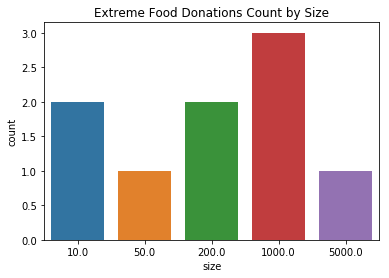

In [16]:
sns.countplot(
    x='size',
    data=food[food["pounds"] >1000],
);
plt.title("Extreme Food Donations Count by Size");

$\text{Only 10 entries for extreme food donations}$

### Counts and Pounds for Company Type

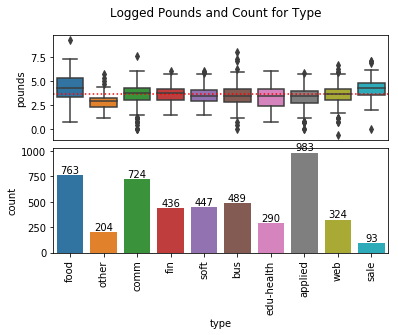

In [17]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x=food['type'],
    y=np.log(food["pounds"]),
    ax=axs[0]
)

sns.countplot(
    x='type',
    data=food,
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y= np.log(food["pounds"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.07)
plt.suptitle("Logged Pounds and Count for Type");

In [18]:
food[food["type"] == "applied"].groupby("company").count()

,Unnamed: 0,Id,date,pounds,id,number,street,city,state,zip,lat,lon,pickup,planned,month,day,year,weekday,size,type
company,,,,,,,,,,,,,,,,,,,,
Aera Technology Inc.,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Bonsai Berkeley,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Boomerang Commerce Mtn.View Ste100,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CYNGN Palo Alto,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Captricity,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Catchpoint,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dataminr,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
Dishcraft Robotics,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Dolby Laboratories / Epicurean Group,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


\begin{align*}
&- \text{A lot of the donations are from companies that are listed under applied}\\
&- \text{Donations from applied are mostly from 2 companies: Dataminr and Zoox}
\end{align*}

### Company Longevity

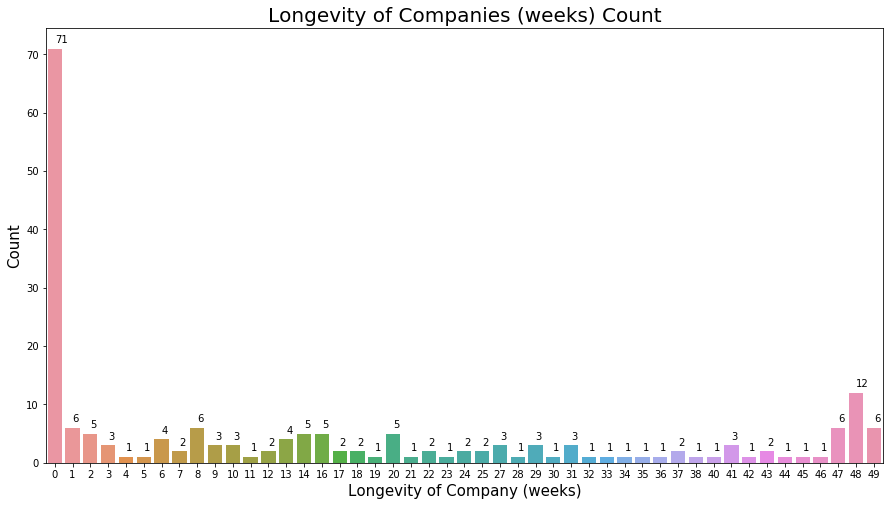

In [19]:
plt.figure(figsize = (15, 8))
longevity_week = food.groupby("company")["date"].agg(lambda x: int((max(x) - min(x))/np.timedelta64(1, "W")))
counts_index = longevity_week.value_counts().index.sort_values()
sns.countplot(longevity_week);
for x, y in enumerate(longevity_week.value_counts().reindex(counts_index)):
    plt.annotate(str(y), xy = (x, y + 1))
plt.xlabel("Longevity of Company (weeks)", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.title("Longevity of Companies (weeks) Count", fontsize = 20);

$\text{A lot of single time donations}$

### Company Location (City)

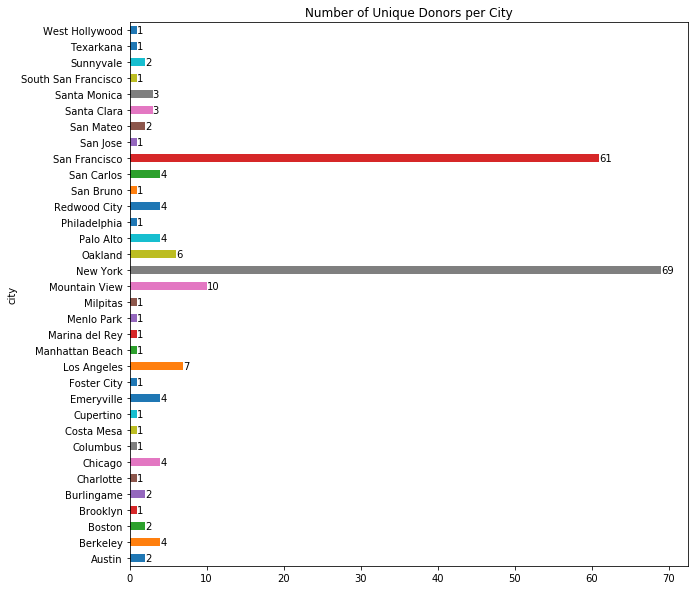

In [20]:
city_companies = food.groupby("city")["company"].unique().agg(len)
city_companies.plot(kind = "barh", figsize = (10,10), 
                   title = "Number of Unique Donors per City")
for y, x in enumerate(city_companies):
    plt.annotate(str(x), xy = (x, y), va = "center")

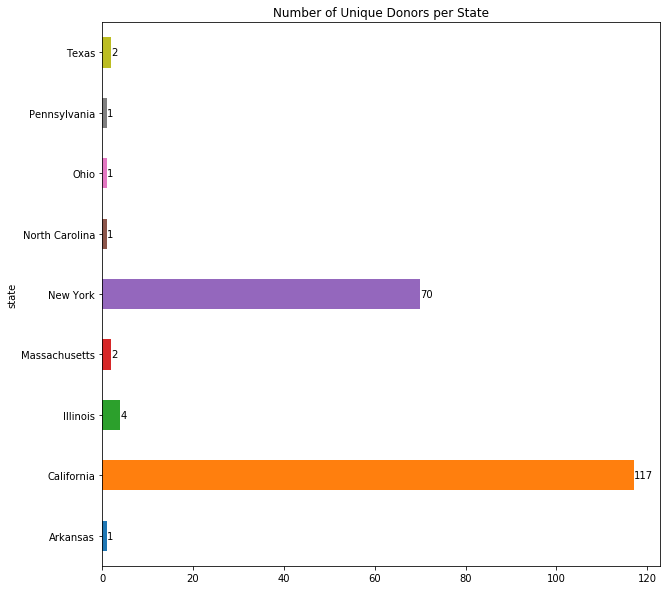

In [21]:
city_state = food.groupby("state")["company"].unique().agg(len)
city_state.plot(kind = "barh", figsize = (10,10), 
                   title = "Number of Unique Donors per State")
for y, x in enumerate(city_state):
    plt.annotate(str(x), xy = (x, y), va = "center")

### Donations per Company

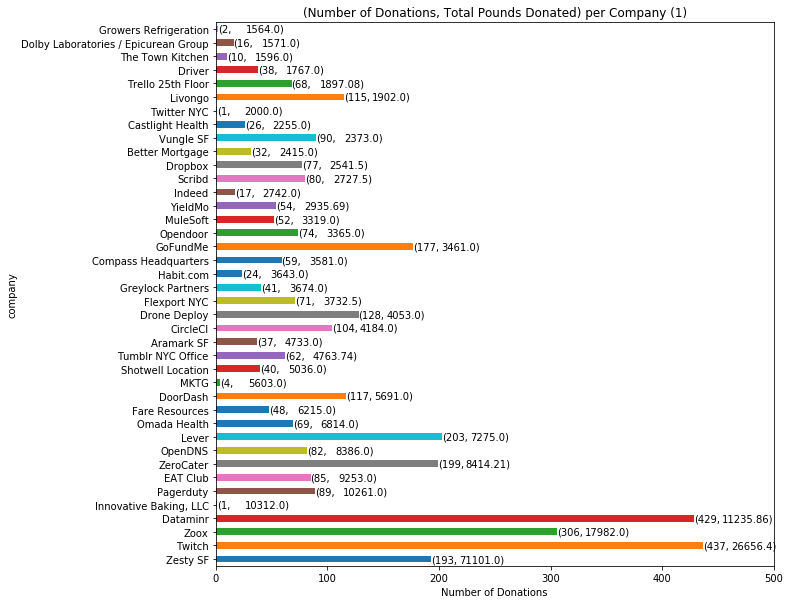

In [22]:
donor_counts = food.groupby("company")["pounds"].count()
donor_pounds = food.groupby("company")["pounds"].agg(np.sum).sort_values(ascending = False)
donor_counts = donor_counts.reindex(index = donor_pounds.index)
ax1 = donor_counts[0:40].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (1)")
for a, b in zip(enumerate(donor_counts[0:40]), enumerate(donor_pounds[0:40])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 25, a[0]), va = "center")
ax1.set_xlim(0,500);
plt.xlabel("Number of Donations");

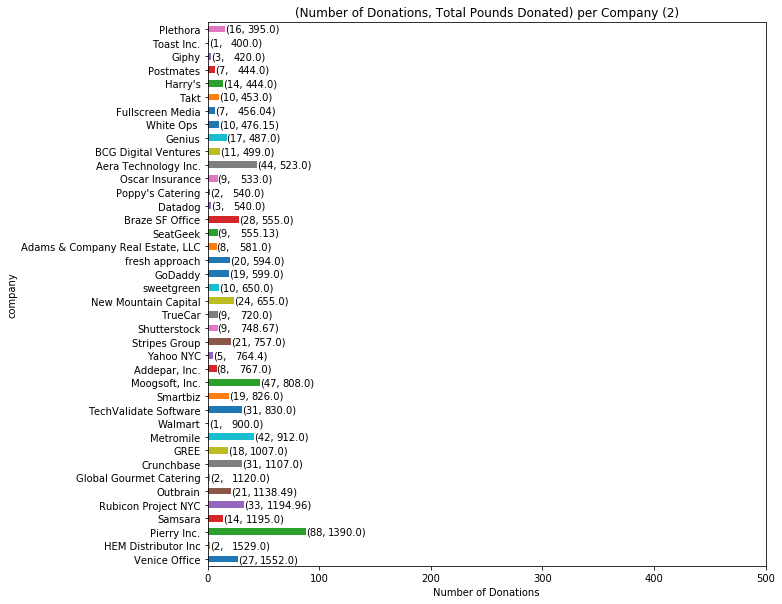

In [23]:
ax2 = donor_counts[40:80].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (2)")
for a, b in zip(enumerate(donor_counts[40:80]), enumerate(donor_pounds[40:80])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 20, a[0]), va = "center")
ax2.set_xlim(0,500);
plt.xlabel("Number of Donations");

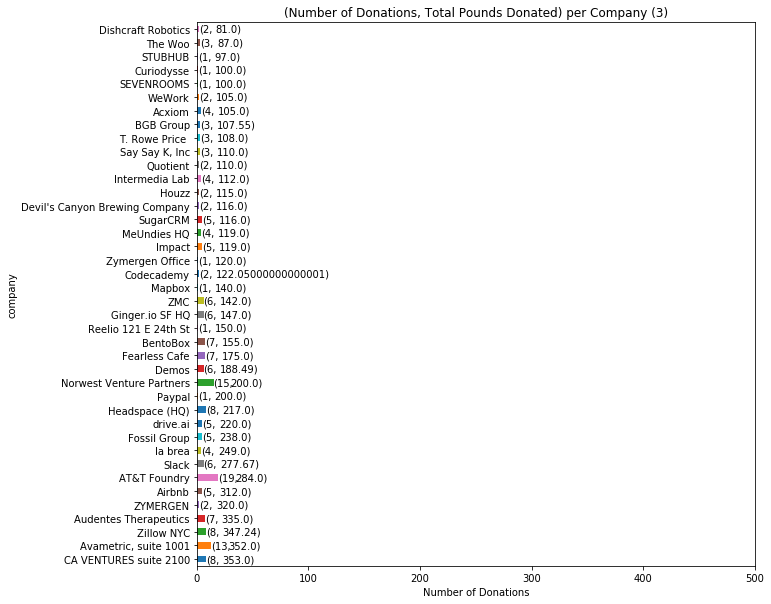

In [24]:
ax3 = donor_counts[80:120].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (3)")
for a, b in zip(enumerate(donor_counts[80:120]), enumerate(donor_pounds[80:120])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(b[1]) + ")", xy = (a[1] + 15, a[0]), va = "center")
ax3.set_xlim(0,500);
plt.xlabel("Number of Donations");

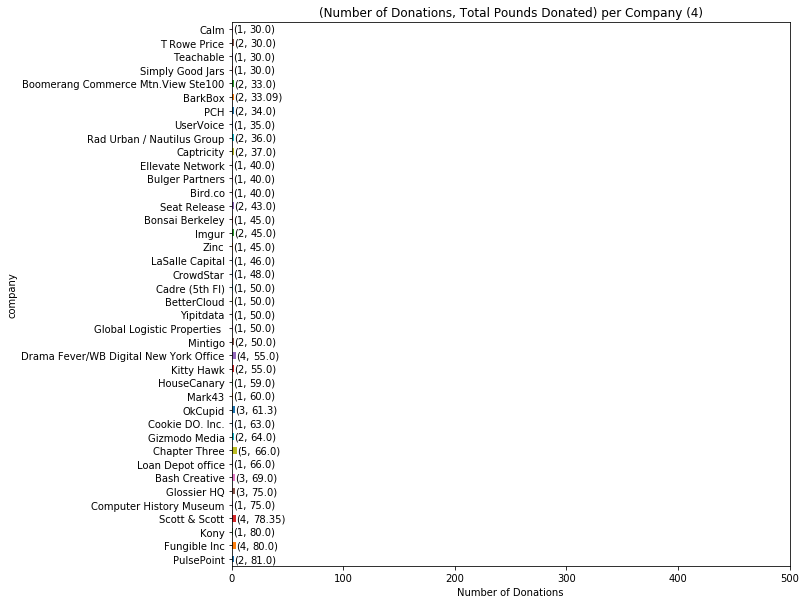

In [25]:
ax4 = donor_counts[120:160].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (4)")
for a, b in zip(enumerate(donor_counts[120:160]), enumerate(donor_pounds[120:160])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 15, a[0]), va = "center")
ax4.set_xlim(0,500);
plt.xlabel("Number of Donations");

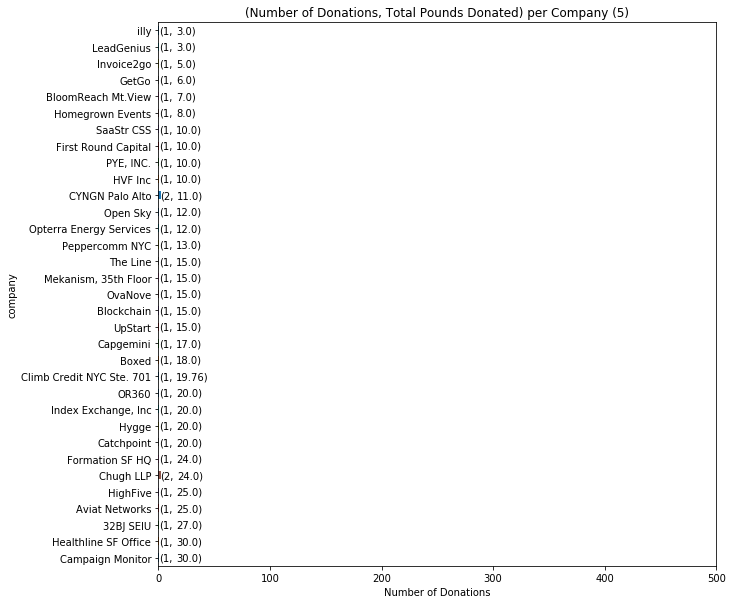

In [26]:
ax5 = donor_counts[160:].plot(kind = "barh", figsize = (10,10),
                       title = "(Number of Donations, Total Pounds Donated) per Company (5)")
for a, b in zip(enumerate(donor_counts[160:]), enumerate(donor_pounds[160:])):
    plt.annotate("(" + str(a[1]) + ",", xy = (a[1], a[0]), va = "center")
    plt.annotate(str(round(b[1],2)) + ")", xy = (a[1] + 15, a[0]), va = "center")
ax5.set_xlim(0,500);
plt.xlabel("Number of Donations");

### 1 Time Donations

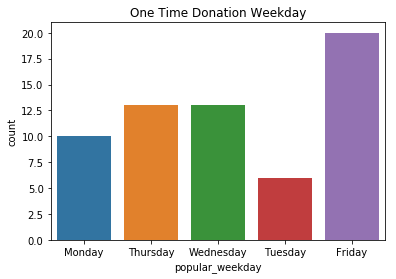

In [27]:
one_donation = company[company["one_donation"] == 1]
sns.countplot(one_donation["popular_weekday"]);
plt.title("One Time Donation Weekday");

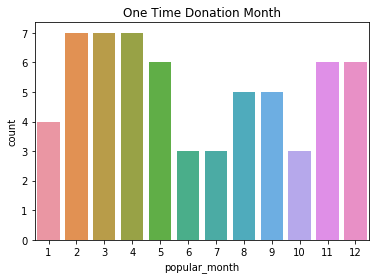

In [28]:
sns.countplot(one_donation["popular_month"]);
plt.title("One Time Donation Month");

\begin{align*}
& -\text{Looking at the companies that only made one donation, there isn't that much}\\
& \text{difference in the distribution of what month the donation was made}\\
& -\text{One time donations does seem to be made on Fridays}
\end{align*}

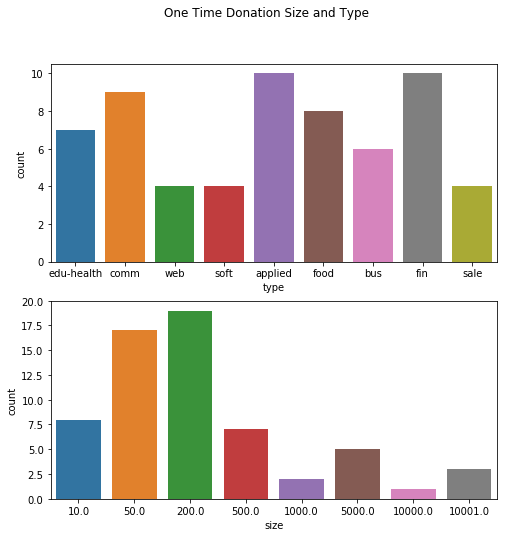

In [29]:
fig, axs = plt.subplots(nrows=2,  figsize = (8,8));

sns.countplot(
    x = "type",
    data = one_donation,
    ax=axs[0]
);

sns.countplot(
    x='size',
    data=one_donation,
    ax=axs[1]
);

# Label the bars with counts
#for patch in axs[1].patches:
#    x = patch.get_bbox().get_points()[:, 0]
#    y = patch.get_bbox().get_points()[1, 1]
#    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
#axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
#axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
#plt.subplots_adjust(hspace=0.07)
plt.suptitle("One Time Donation Size and Type");

\begin{align*}
&- \text{There doesn't appear to be any company type that are more likely to be one-time donators}\\
&- \text{Companies that are between 50-200 employees are the most likely to be one time donators} \\
& \text{however 50-200 employees companies are also the most common companies overall.}
\end{align*}

In [30]:
one_donation["week_donation"].sort_values().head(10)

189     3.0
100     3.0
96      5.0
68      6.0
20      7.0
86      8.0
141    10.0
60     10.0
126    10.0
80     10.0
Name: week_donation, dtype: float64

Min donation for one-time donators is: 3.0
Median donation for one-time donators is: 30.0
Max donation for one-time donators is: 10312.0
0.1 quantile for one-time donators is: 10.0


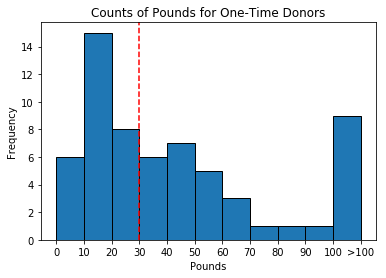

In [31]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
one_donation["week_donation"].clip(upper = 110).plot.hist(bins = bins, edgecolor = "black")
plt.title("Counts of Pounds for One-Time Donors");
plt.axvline(x = one_donation["week_donation"].median(), color = "r", linestyle = "--");
print("Min donation for one-time donators is: " + str(one_donation["week_donation"].min()))
print("Median donation for one-time donators is: " + str(one_donation["week_donation"].median()))
print("Max donation for one-time donators is: " + str(one_donation["week_donation"].max()))
print("0.1 quantile for one-time donators is: " + str(one_donation["week_donation"].quantile(0.10)))
ax = plt.gca()
ax.set_xticks([0, 10, 20,30, 40, 50, 60, 70, 80, 90, 100, 110]);
ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, ">100"]);
plt.xlabel("Pounds");


\begin{align*}
& - \text{Of the companies that only donated once, the minimum number of pounds donated was 3 pounds} \\
& - \text{Most companies donate between 10-20 pounds of food}\\
\end{align*}

### Top Donators 

Min min donation for one-time donators is: 0.5
Median min donation for one-time donators is: 3.0
Max min donation for one-time donators is: 35.0


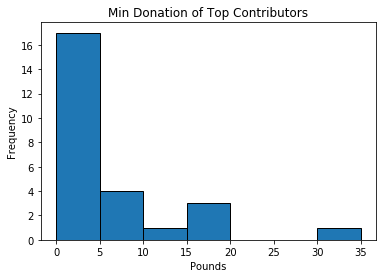

In [32]:
top_contributor_donations = food[food["company"].isin(company[company["top_contributor"] == 1]["company"])]
top_contributor_min_donation = top_contributor_donations.groupby("company")["pounds"].min()
top_contributor_min_donation.plot.hist(bins = np.arange(0, 40, 5), edgecolor = "black")
plt.title("Min Donation of Top Contributors");
print("Min min donation for one-time donators is: " + str(top_contributor_min_donation.min()))
print("Median min donation for one-time donators is: " + str(top_contributor_min_donation.median()))
print("Max min donation for one-time donators is: " + str(top_contributor_min_donation.max()))
plt.xlabel("Pounds");

\begin{align*}
&- \text{Minimum donations from companies that repeatedly donate is around 0-5 pounds}\\
& \text{versus 10-20 pounds from one time donators}\\
\end{align*}

Minimum mean donation for top donors is: 15.7954545455
Median mean donation for top donors is: 47.05699930699931
Max mean donation for top donors is: 368.398963731


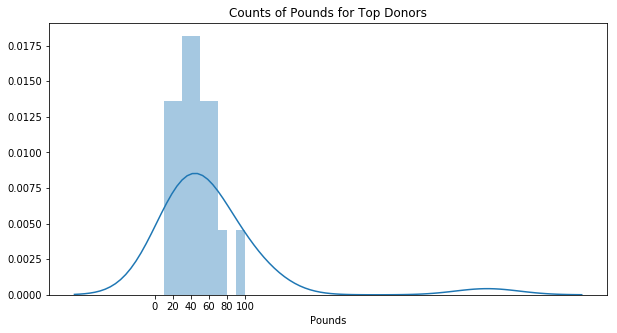

In [33]:
fig, axs = plt.subplots(nrows=1,  figsize = (10,5));
bins = [0, 10, 20, 30, 40,50, 60, 70, 80, 90, 100]
top_contributor_mean_pounds = top_contributor_donations.groupby("company")["pounds"].mean()
#top_contributor_mean_pounds.plot.hist(bins = bins, edgecolor = "black")
sns.distplot(top_contributor_mean_pounds, bins = bins)
plt.title("Counts of Pounds for Top Donors");
print("Minimum mean donation for top donors is: " + str(top_contributor_mean_pounds.min()))
print("Median mean donation for top donors is: " + str(top_contributor_mean_pounds.median()))
print("Max mean donation for top donors is: " + str(top_contributor_mean_pounds.max()))
ax = plt.gca()
ax.set_xticks([0, 20, 40, 60, 80, 100]);
#ax.set_xticklabels([0, 20, 40, 60, 80, ">100"]);
plt.xlabel("Pounds");


\begin{align*}
\text{Average donations from top donors tend to be around 40 pounds} 
\end{align*}

In [34]:
company.head()

,company,max_pound_weekday,num_donation,num_weeks,one_donation,popular_month,popular_month_frac,popular_weekday,popular_weekday_frac,size,start_month,state,type,week_donation,top_contributor
0,32BJ SEIU,Monday,1,1,1,9,1.000000,Monday,1.000000,500.0,9,New York,edu-health,27.000000,0
1,AT&T Foundry,Monday,19,11,0,4,0.473684,Wednesday,0.526316,50.0,3,California,comm,25.818182,0
2,Acxiom,Thursday,4,15,0,4,0.500000,Thursday,0.750000,5000.0,2,New York,bus,7.000000,0
3,"Adams & Company Real Estate, LLC",Tuesday,8,18,0,1,0.375000,Wednesday,0.250000,200.0,1,New York,fin,32.277778,0
4,"Addepar, Inc.",Friday,8,15,0,5,0.375000,Friday,1.000000,500.0,2,New York,fin,51.133333,0


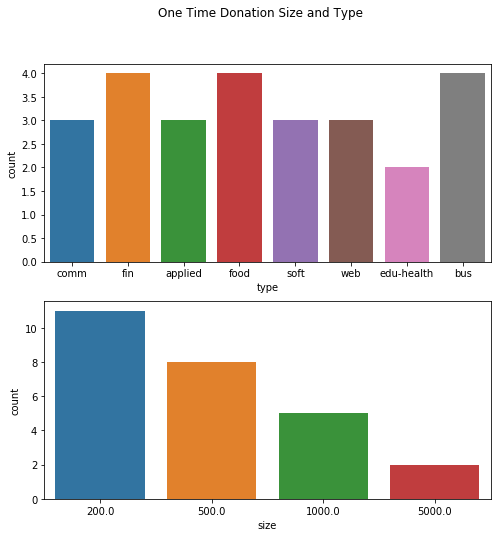

In [35]:
fig, axs = plt.subplots(nrows=2,  figsize = (8,8));
top_contributor_comp = company[company["top_contributor"] == 1]

sns.countplot(
    x = "type",
    data = top_contributor_comp,
    ax=axs[0]
);

sns.countplot(
    x='size',
    data=top_contributor_comp,
    ax=axs[1]
);

# Label the bars with counts
#for patch in axs[1].patches:
#    x = patch.get_bbox().get_points()[:, 0]
#    y = patch.get_bbox().get_points()[1, 1]
#    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
#axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
#axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
#plt.subplots_adjust(hspace=0.07)
plt.suptitle("One Time Donation Size and Type");

In [48]:
from pandas.api.types import CategoricalDtype

def ohe_size(data): 
    cats = data["size"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['size'] = data['size'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='size',
                    columns=['size'], 
                    drop_first=True)
    return data

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


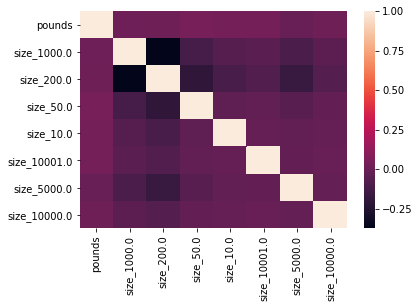

In [49]:
sns.heatmap(ohe_size(food[["pounds", "size"]]).corr())